# Necessary Header Files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pendulum

# Current cost function

In [2]:
def get_cost(x,u):
    cost = (x[0] - math.pi)**2 + (0.01*(x[1]**2)) + (0.0001*(u**2))
    return cost

# Q table 

In [3]:
q_table = np.zeros(shape=(50,50,3))

# Value and policy Function

In [4]:
def get_policy_and_value_function(q_table):
    
    value = np.zeros((50,50))
    policy = np.zeros((50,50))
    
    for i in range(50):
        for j in range(50):
            cost = np.min(q_table[i,j,:])
            value[i,j] = cost
            control = np.argmin(q_table[i,j,:])
            policy[i,j] = U[control]
    
    return policy, value

# Q Learning function  for U = [- 4,0,4]

In [5]:
def q_learning(q_table):
    
    x = np.array([0,0])
    episode = 0
    policy, value = get_policy_and_value_function(q_table)
    for i in range(100):
        i_theta = np.argmin(np.abs(discretized_theta - x[0]))
        i_omega = np.argmin(np.abs(discretized_omega - x[1]))
        
        if random.uniform(0,1) >= 0.1:
            upd_u = policy[i_theta,i_omega]
        else:
            upd_u = np.random.choice(U)
            
        upd_cost = get_cost(x,upd_u)
        x_next = pendulum.get_next_state(x,upd_u)
        i_theta1 = np.argmin(np.abs(discretized_theta - x_next[0]))
        i_omega1 = np.argmin(np.abs(discretized_omega - x_next[1]))
        x_nextid = value[i_theta1, i_omega1]
        u_id = np.where(U == upd_u)[0]
        
        #Appending Q table
        q_table[i_theta,i_omega,u_id] = q_table[i_theta,i_omega,u_id] + 0.1*(upd_cost + (alpha**i) * x_nextid - q_table[i_theta,i_omega,u_id])
        
        #Updation for next iteration
        x = x_next
        episode = episode + upd_cost
        
    costplot.append(episode)

# Plot of Learning Progress

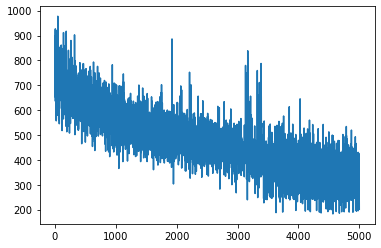

In [6]:
costplot = []

U = np.array([-4,0,4])
# we generate 50 equally spaced points for theta
discretized_theta = np.linspace(0, 2*np.pi, 50, endpoint=False)

# we generate 50 equally spaced points for omega
discretized_omega = np.linspace(-6, 6, 50)

alpha = 0.99

# Running 5000 iterations
for i in range(5000):     
    q_learning(q_table)
    
plt.figure()
plt.plot(costplot)    

In [7]:
# we can also simulate the robot but we need to provide a controller of the following form
def dummy_controller(x):
    
    i_theta = np.argmin(np.abs(discretized_theta - x[0]))
    i_omega = np.argmin(np.abs(discretized_omega - x[1]))
    u_id = np.argmin(q_table[i_theta, i_omega])
   
    return U[u_id]


# we can now simulate for a given number of time steps - here we do 10 seconds
T = 10.
x0 = np.array([0.,0.])
t, x, u = pendulum.simulate(x0, dummy_controller, T)

Text(0.5, 0, 'Time [s]')

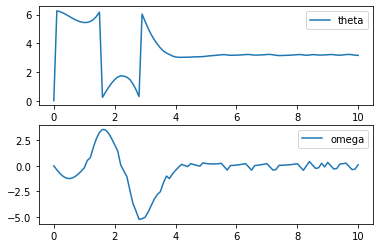

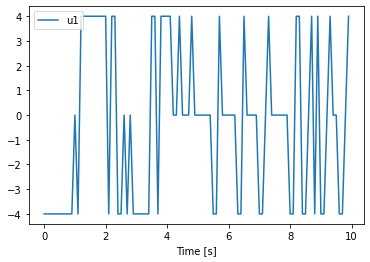

In [8]:
# we can plot the results
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')

In [9]:
# now we can also create an animation
pendulum.animate_robot(x)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAZEVtZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMyBsb29rYWhlYWRfdGhy
ZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAApyZYiEAD///vdonwKb
WkN6gOSVxSXbT4H/q2dwfI/pAwAAAwAArqxz6KZIGF3rxgACbgAFu4zmQp4JngAoudzLjZGjExPk
m9AqIfYoRRUeYo5clMnTG2rcyJVD23Au91nrClSvF7IHxUujZpCwzX5lQpCy76A5JPnaUBbvg11C
imxqwQEt3PrLryew90jiK5ujBtkyNF7VQFkVr2lguQenzBOMPnvQ1aAzNErTQ8El10inQSNfaWNr
c/4TH/lRdm34gg+PN1Ilb5dXJoJsF6WoQxU7GJ7uhRpNNv9EouEAS9HeRO0pnHIqWOfwc4nRKGmh
NsbmKn/ZzCnAmJFoLpoutSCxpWULHq3T2xk3xogsn3kQoKLNcSC8QX5eMb9reoa6+Y6sStz5e087
3QTk/zZ9zfxxh0YLFnCKzLSzqFTEeZ06HfZmRQH1uEW9i1cltJPgmPsjjrlDnX3+Z0DSefwAj9y0
yijT7AJwnx1IMAxNfwz72kZ9eZ+DTdcNHuUdq87rn6zcYTMPedbh3NX0fzPztdRlJuvE96Y3zK5W
G5QHSlLXlLnF7nzUWEBpwcnkW2zAbJTXZMdpxqvGW+1v2jbGrrYRk15R7rozov/XFBqOxb1IPWyy
DZyw4e5qABZAAADxSm671Y7KKEhr6NfZkvBlTi6LP4DmAP6J534hONnniy+BUT+UN9RQ/IQjKfV+
IR9hTU/VWlsdpKbMoInFzN6WFCLLa/gUPQWzXZaYAcfY0wGktimS9OEXbUUZYpiFLuOs3iVA3gxn
I4bFkNcdUTInrJ15JeAnzgQhnhzvS3y6TP7ZBFhGIlMF3YFNRDXNx0VlLkmOmVeuuO/NoyCLk13L
N3uqGgjfpVY1RysNT0rugb1pbbTs7w5g1tGrApQ1mKG+5ktbTIYTz4lmpLHM/4zCN75wI/Zj035l
EAtCTQiJoUeSDzI24+qrxNtqdQY6fnKPCfod4EgaSAAAAwAAAwAGHv6TtjqBIRLAbVfam5yNn/5z
1ikRxRzFQ5YbtV2PgiPIiHao542pkv1+j/9HbhVE5whG9lx1sgJeXPnkIUdjpeupWQcCXstfQFCa
8iliX6Ilc0qnnVn4ZRH4JNqNccvxKRduuo1xZZyJPhbWgoo32xJ98bpv2tlKJW4E/GfT+uNBSwir
ST+QWglvx59OxnUBvoPHSuX62yinaK9lYhNcSlNQYZUvKybXRRnfYustNsoykQSDqpc5dkPTolM3
zrStXwOT9QsamBhhGCIxWgP6bkNePvFEAMhMsfJ3fAo7JR3aIAUyvxyziHQv4jn3rMJrfQLks3cq
lNopfUhBlLIqA32uH/5i1W+uVeGTWgukH5QR+GPoB11Qu6dK6YMieKqCo7tHV586Z+twekSqRrhL
IQxu16oCpnnQo9AAXsMtTHelKI90zUm9rLtYf4OG5SbgyAAWV1+uoCQhAAADAAADAAtlEOPsPgcL
B5vjY3i9JvOMzs1/7VDlEEMbjXILEuhHxDtxpcDFo/zdu38bOb1WrXm9nYXgbHnfHU0vGX4680b7
+oDWh2DP1xMf/jc+bZQT4Zs44tEJgscZ9o55a2sk+yZgscAiqZeNvZOoadjTamGyA5qEck3bP+12
nomqEbg203d47MZuzqi3e+OmqazlKaEK1RQJObjXFjCBENB2y/NupdFzFrqoiz40pLcZWqOm8enO
fHBB+4FXET2PY4q7ANzmdosyu/EP/i39vv9S6Baw4ufL4XPtPk6mMrjTxrjRQQ/PhTNmBLGjv2/T
N+GvVYkWNeyvXfHKGfproP+wQLxZxvifgZYLoQSD4N0TtNCZfdot5uvBzDrkm3vSNYvqzL5Isvds
w1cOcBVFtHr6uUyYiiiZYPKQwyiG6/78LDX32mlQIoMDAAADAAADAau19oIvBOeOX54XaMgcBLCa
8SNJf0yU5tjjI7yn6og/iYX+Qvi54yRePXTYUiGeImOuUHirPxw4L0roXVE+SBIv7J6KVA7MBm41
NEXOnX8PJYH0KhPNq+GJxBaM5vXVfvNxwYtxkvu+SMO9wRJpGU/ueg6XkxOZ71qj7i6gvvOMYwgz
twhLc7g07iXqyyBqEJOV6Ia2Z6oCnhHmYOlWMvxif//HJkqaw2Q/iBf5cnAJa7Fq4VNAe7z9Ztlv
Bo2T/kpz+IG0al7WV2STymseXsR8brvaX2QXlXEvJgVEDExpAOZPdDVcJQs+UKZ+Yb7iRfyu7Qs6
59xcmPgDQx7HcoRhP2QN1cz2fB67rf4hmiD20yv8m1gCsqoX4V3TFwSbJLI6Fw2ckr1QzFD3sHAw
FgX6AZblUIaul29RA+iutumor5m1XJn8XbfV0b3lBa7jhr6/PBGqtnU4Yloiiagibi4rscUCyNMj
8sisYYTUBmyiweSfTGRcp00GaoBAUR52xDdBnFLARUFAnutDw34ZIF6gro/lFmegycK+DHQFoUVr
BmdcUV4cTE5CXSxKucJV/FgbA0mk9rhTczShQFFawZnXFGJpB/tsYnEryPYXhEkmXFrrg08Mn6FO
HDq8lUSdZJazhmQBOSTHN7e/Nasz1e0Amy+SRvpJGt1h/FZvAwncjqusW7vNoM8Iiub9lf351gjC
AiaA3n/w29DDdqgcAg7wcg1aXydhxcfwLgREzT93afBJ8P9svMYjSTqjFLG7IpFVN/6wWyHyUAYU
+ai0P1HRjionsrHM7I6Rd0dZnKMVof+ACeinl+21406F3rXguNg2EgRj33LDy2G1BPN1/eoFtMnX
tkoUlueM37oVt3KTXEIQstRu0awAOZRiIgjBmmHwkMHYgCHBdOPLzakOmqQAsKUOFe9C2MtELqr2
fX3g74UyFCkWjORljnwZB14FXexkjitAIURSUCxXWg9nc6StbvoZr5B9lQy1pXlTfwr/9mRl5cNP
lhGCm5plotshgLWRLeVxM

# Plot of the found policy and value function as 2D images 

Text(0.5, 1.0, 'Policy')

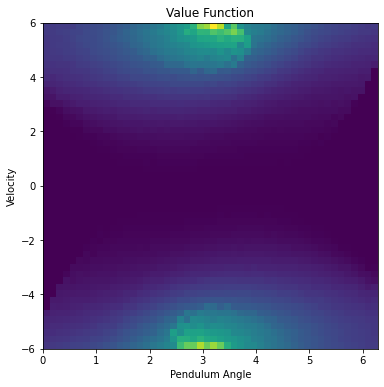

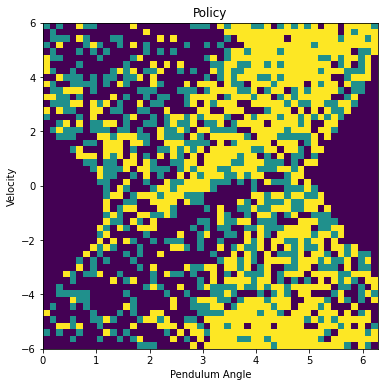

In [10]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2

policy, value_function = get_policy_and_value_function(q_table)

# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')

# Reinitailize Q table

In [11]:
q_table = np.zeros(shape=(50,50,3))

# Q Learning function  for U = [- 5,0,5]

In [12]:
def q_learning(q_table):
    
    x = np.array([0,0])
    episode = 0
    policy, value = get_policy_and_value_function(q_table)
    for i in range(100):
        i_theta = np.argmin(np.abs(discretized_theta - x[0]))
        i_omega = np.argmin(np.abs(discretized_omega - x[1]))
        
        if random.uniform(0,1) >= 0.1:
            upd_u = policy[i_theta,i_omega]
        else:
            upd_u = np.random.choice(U)
            
        upd_cost = get_cost(x,upd_u)
        x_next = pendulum.get_next_state(x,upd_u)
        i_theta1 = np.argmin(np.abs(discretized_theta - x_next[0]))
        i_omega1 = np.argmin(np.abs(discretized_omega - x_next[1]))
        x_nextid = value[i_theta1, i_omega1]
        u_id = np.where(U == upd_u)[0]
        
        #Appending Q table
        q_table[i_theta,i_omega,u_id] = q_table[i_theta,i_omega,u_id] + 0.1*(upd_cost + (alpha**i) * x_nextid - q_table[i_theta,i_omega,u_id])
        
        #Updation for next iteration
        x = x_next
        episode = episode + upd_cost
        
    costplot.append(episode)

In [13]:
costplot = []

U = np.array([-5,0,5])
# we generate 50 equally spaced points for theta
discretized_theta = np.linspace(0, 2*np.pi, 50, endpoint=False)

# we generate 50 equally spaced points for omega
discretized_omega = np.linspace(-6, 6, 50)

alpha = 0.99

for i in range(5000):
    q_learning(q_table)

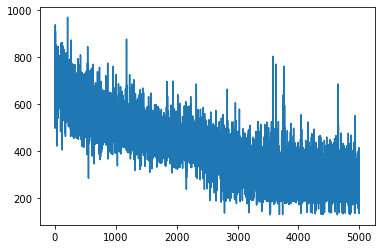

In [14]:
plt.figure()
plt.plot(costplot)

In [15]:
# we can also simulate the robot but we need to provide a controller of the following form
def dummy_controller(x):
    i_theta = np.argmin(np.abs(discretized_theta - x[0]))
    i_omega = np.argmin(np.abs(discretized_omega - x[1]))
    u_id = np.argmin(q_table[i_theta, i_omega])
   
    return U[u_id]


# we can now simulate for a given number of time steps - here we do 10 seconds
T = 10.
x0 = np.array([0.,0.])
t, x, u = pendulum.simulate(x0, dummy_controller, T)

Text(0.5, 0, 'Time [s]')

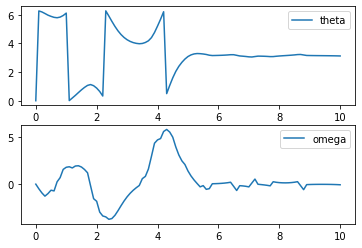

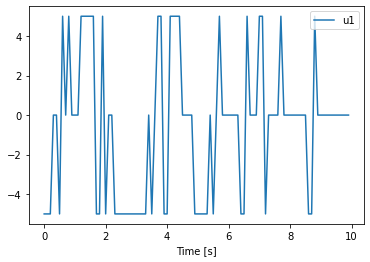

In [16]:
# we can plot the results
plt.figure()

plt.subplot(2,1,1)
plt.plot(t, x[0,:])
plt.legend(['theta'])

plt.subplot(2,1,2)
plt.plot(t, x[1,:])
plt.legend(['omega'])

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1'])
plt.xlabel('Time [s]')

In [17]:
# now we can also create an animation
pendulum.animate_robot(x)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAb01tZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMyBsb29rYWhlYWRfdGhy
ZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAApqZYiEABD//veBvzLL
XyK6yXH5530srM885DxyXYmuuNAAAAMADN2InuDwrXQ9FeAAICAAUTkeZCngr+ABs+FTpEmHxPfw
w3BGSVzNCQT4FB6nH/jCVfIK24/+gq2C8xw0rQirwhc/ePQfLGPhj7IUacxmNu8U0I72BAXUVvFC
UQui/HztBuERkU76T/YPXWbqHPYl7/38FzL2XOEBztHjr/jJnzpTxq/jYjXJcLla/9o2V/9BxiYb
wMAgPPN1QfMXEAAC07285ivYdt3Kl48Ynh4MJ6LXVfQ3oe6mAZMr+gFCfeZfanb4DTD4HFfm0Dt9
/tmCNU+OrIVvNVnDMfgh03RkbwEcjbdBJlvErmcClPK5u0L8vXx+kSk5xmoDPEtz5e0873QUQtKj
Zaxlhh0YLFnCKzLSzqariHZ06HfZmRQH1uGKwtVaxK7BBsx+gyyXXKJv6djtOCAqbmMzbJyv6PXS
MgKRrA+yGTsqd/sAGe5uAsQs5ojHdILHhmqC5I6sVnuGJCR5CABH6n6qceJqz4xN1cnmMo4520r7
UAy8eTq9VTpAKY2hrQ4T7KXwNb9dPqIxBrcfTqHF4feN//IEZd7okPwi4oSzHvsiCgLV29/Lt/KI
3alyvSbRUs+Wr549wH//IujcNJ7fzB4Z0zp8GzDdj7OTUXZ6dyKbeg0yq+iqf7jITc1lI3OHCKCR
tXrQ8mvOiOx6C2a7LTADj7HAUL0iOiYxURHj4OHJxpS27Lmj/rI9UXLF0QMnWOqJkT1k68kvAT6W
HC5w53pb5dJn9sgx+pn3QtzPPg9zHGmizXMY7raFOs/z05Ra58TCykGyB65xKq2iMj+mv7wwS7Nv
sqTSJfB48JjDn37DsuGcvNTNbKheK52e9OfaBGIhiwx/L7ORmvMVFUbdPHm+RHr45h5iBzOhEHsI
jxmyO7NnnvUEHG7gD5zZ/kwnPADi3yvggADHR04xAGl8EhEsBsreBz0jfdo3o6YtYbVEo+NP0EtK
UHo/X7lUs6G1Ml+v0f/0sMUrlxoD73LHZnpD5c+eQhEWJ3UqlZBwJey4MYYghxZ+3vD+wrR8srwv
U9wK0UqOy5g4z4b6OubS8CsfFBOQ3k+/t2Un3xu/LgEGnAQYasMDksZV93MQSQhGQ9b9OYe0BDOo
DfB0XudqUgLlwCnF17ws1P2xfYTn6bzNrFLk9eud2XuWKRK821s/rCBsb6vsmWPA3Uw8nzkzY4mA
L7N2rWHWiYP6SgRXK4UqMLYLXsKk54bMsvGWFYWs574h6Aj384LnF6sDvk4/lII/AcAi6boBgLy/
/MsRYjECOnaDXRYlHQSvbVhVzWInVxC7An7Ksj0XtVmZ48v7hkVkxlLSjIbaU/JPAyL1FQXBXRaa
DRz6nRZNB0VIXHK4PUvwAAOjmrrkIJVS36a6npV1seNDZekYOhDPbOv7AhMSHl8xSeaWmxEf913R
TbvuU7iO7unO5SDWf0BMlPMVAgTxurJngPTiUomIS3se6XzxmlBlSptuR8gNaHYM+hRH/+N35NlB
PhmzgiEOD/riz7Rzy1tZJ9kuxY4BFUy8beyc8bCvWgy42T0V6vRYPpm12nomqEbg200N47MZuzqi
3e+NlJKzlJrEK1RQJJDGE3XaGTjJGFFvojSm5i11URZ8aUljhXxMiWC4ixchxLgVcRPY9jLOMQ3O
Z2izK78Q/+KZwTISWoVh32+IoHbSmkdLRwdIhTzjHUlAHgBHcg+V77osyBRlKXQZXHwy75PkC/qX
Y8SlD/jsUS4i6H5Ftn9xtksbpzwe5n10IwjkbIPYZBDQ+C2OlWQPRkgRYTG3FemQgi7tEy3mFqJH
CUONgDTpd9UcQ865e00toCEgAAADAgcwdFVGP77ULXtTgxcRGpp5EFunFFqf4y9DPhOvBYcY0oH8
8M1VJDVfYSjg9dNhSpfC7v8YXtwJfgcBFtEF1RZ6y0lpyuXEfG8fl8LMimFZM21esD6FQnm1fDE4
gtGaVzpuuXccGLcZL7voaaWtHUoTEh3jsfuJ6Z908/JNa1xMDvQCWP8QaKmqrz+Ki5GeRrtHbiOD
qj05n/Onb8QNGotvXbK///GxMyaw2Q/iBf5cm/xYXD4+LuYn8f1m2W8GjY6U/ESHrd/sknlRc0zI
iP5v5yleHEvCC5aUz4j8QQCfZKyaBHYUJ/+EGhP2eAsj5Glxcn2xZW25MOwsdtrJdU8sLrnYpmx9
sL8kvX2CNL9QI/5VSOmKF4JJ3aH/eh8PmmJNVuHNA0kZd2uvw1eLzNqpOR+1Ges+EotTG5Hl+9tz
1xEF2koBiUr85W8jlt7nr0pCMhXzn1NlxJiabIyE7r0O3W4uK6CB9mkYP8/SpOwdgY4qY1rmyppj
sq6yc4DiUqSl9ZreDBawZnXFGKirb9sh/hlIgQ2KvUFdH8osz0GThQ4kdAWhRWsGZ1xRWi564src
d6TvNGXdYSr+LA2BpNJ7XCYk8s+typFwZnXFGGC6/t4IVbteR7C8Ikky4tdbpNoRmbPySkvspH8U
PojWbU0hrNTq9uZ47lPMCzPV7QCU48kjfSSNbrD+KzdT3qIx/6uvR5BtC7PUAmEMGjH2jcVAyrL3
f8rMSQuUxj6pe47ztfYhyNctrJf4FwIiZp+7tPgk+H+sYNjtZ+Sq83AcMeYQXUMdC2Q+SgDCny3Z
+7CVb1CRgdnP5N50+Ksf3j2o7BWdZpXYRL6c3cq2wiGM34rJOn4/AOf6vewvHnqmsfaN64/TrtrE
40c72VYkd32zG/zBxKxF+kTreXL+fXREjfcYM0w+Ehg6/1g3sEEWAfpV7e7CnR0WR/J7ppfdnKe0
h4KuqAiV3FzkZY6tEkfeBV3sZI4sAt4ccs7LEObNRSanK4CrYgsy5roLKm9Y1O+P1BpN8BAcTEI3
1kB8U0NenR0Usia/miqX3

# Plot of the found policy and value function as 2D images

Text(0.5, 1.0, 'Policy')

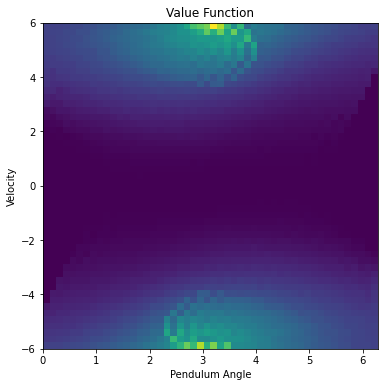

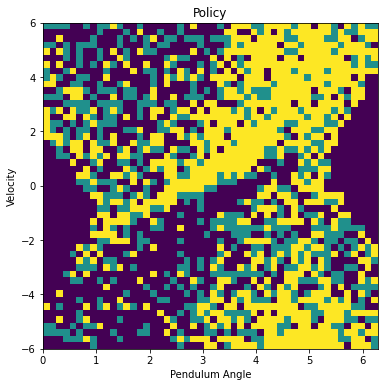

In [18]:
# here is some code to plot results, assuming a policy and a value function are given
# this can be used to answer questions in both Part 1 and 2

policy, value_function = get_policy_and_value_function(q_table)

# we plot the value function
plt.figure(figsize=[6,6])
plt.imshow(value_function, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Value Function')

# we plot the policy
plt.figure(figsize=[6,6])
plt.imshow(policy, extent=[0., 2*np.pi, -6, 6], aspect='auto')
plt.xlabel('Pendulum Angle')
plt.ylabel('Velocity')
plt.title('Policy')